Q. 7

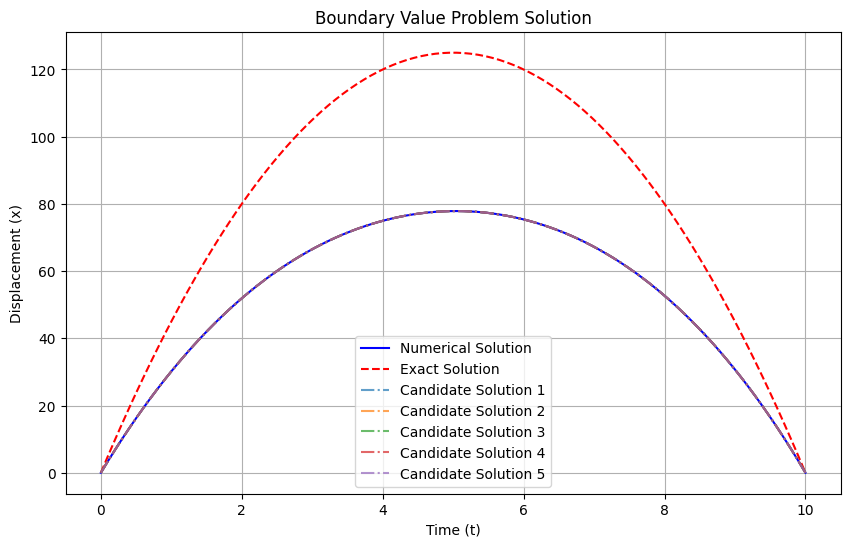

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
g = 10
t1 = 10
num_candidates = 5

# Define exact solution
def exact_solution(t):
    return -0.5 * g * t**2 + 0.5 * g * t1 * t

# Relaxation method function
def relaxation_method(x0, x1, num_points, tolerance=1e-6, max_iterations=1000):
    delta = (x1 - x0) / (num_points - 1)
    x = np.linspace(x0, x1, num_points)
    # Initial guess
    u = np.zeros(num_points)
    # Boundary conditions
    u[0] = 0
    u[-1] = 0
    # Relaxation loop
    for _ in range(max_iterations):
        max_diff = 0
        for i in range(1, num_points - 1):
            old_u = u[i]
            u[i] = 0.5 * (u[i-1] + u[i+1] + delta**2 * g)
            max_diff = max(max_diff, abs(old_u - u[i]))
        if max_diff < tolerance:
            break
    return x, u

# Generate numerical solution
x_num, u_num = relaxation_method(0, t1, 100)

# Generate candidate solutions
candidate_solutions = []
for _ in range(num_candidates):
    _, u_candidate = relaxation_method(0, t1, 100)
    candidate_solutions.append(u_candidate)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_num, u_num, label='Numerical Solution', color='blue')
plt.plot(x_num, exact_solution(x_num), label='Exact Solution', linestyle='--', color='red')
for i, u_candidate in enumerate(candidate_solutions):
    plt.plot(x_num, u_candidate, label=f'Candidate Solution {i+1}', linestyle='-.', alpha=0.7)
plt.title('Boundary Value Problem Solution')
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.legend()
plt.grid(True)
plt.show()
